This is the 1 epoch
Mean Square error:5.590140342712402
This is the 2 epoch
Mean Square error:16.852054595947266
This is the 3 epoch
Mean Square error:0.11445651203393936
This is the 4 epoch
Mean Square error:0.23699359595775604
This is the 5 epoch
Mean Square error:0.11929240822792053
This is the 6 epoch
Mean Square error:0.06291518360376358
This is the 7 epoch
Mean Square error:0.05856986343860626
This is the 8 epoch
Mean Square error:0.08562970161437988
This is the 9 epoch
Mean Square error:0.12888066470623016
This is the 10 epoch
Mean Square error:0.17768526077270508
This is the 11 epoch
Mean Square error:0.22458000481128693
This is the 12 epoch
Mean Square error:0.2644554078578949
This is the 13 epoch
Mean Square error:0.29408836364746094
This is the 14 epoch
Mean Square error:0.31183478236198425
This is the 15 epoch
Mean Square error:0.31737175583839417
This is the 16 epoch
Mean Square error:0.31146955490112305
This is the 17 epoch
Mean Square error:0.2957540452480316
This is the

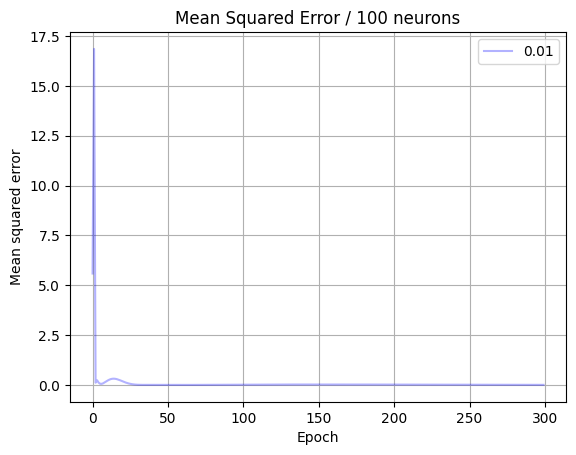

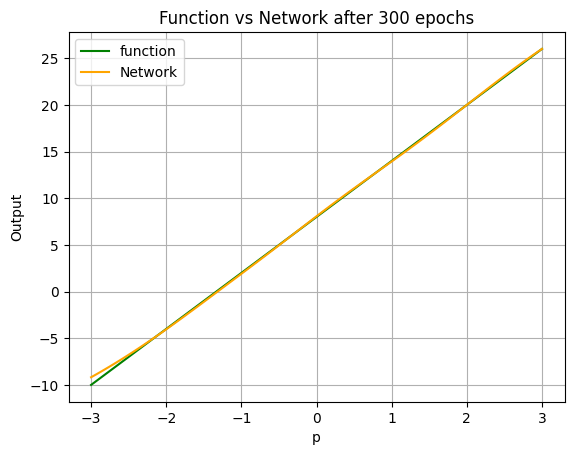

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import torch

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=300
    s = 100
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s)  # Parameter initialize

    for epoch in range(epochs):
        print("This is the {} epoch".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]
        print("Mean Square error:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO: Plot
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s): #initialize parameter W and b
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2): #forward propagation

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2): #backward propagation

     s_2 = -2*1*error

     # TODO:Calculate F1 and transform to diagonal matrix
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ): #update parameter

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Epoch')
    plt.ylabel('Mean squared error')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Mean Squared Error / {} neurons'.format(s))
    plt.show()

def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label='function')
    plt.xlabel('p')
    plt.ylabel('Output')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Function vs Network after {} epochs'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()


def approximate_function(a_0): #function we want to approximate
    return a_0*6 + 8






if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:6.398860931396484
This is the 2 epoch
Mean Square error:2.0117135047912598
This is the 3 epoch
Mean Square error:3.6292974948883057
This is the 4 epoch
Mean Square error:3.5399887561798096
This is the 5 epoch
Mean Square error:2.653689384460449
This is the 6 epoch
Mean Square error:1.9101648330688477
This is the 7 epoch
Mean Square error:1.3200477361679077
This is the 8 epoch
Mean Square error:0.8776580095291138
This is the 9 epoch
Mean Square error:0.5642508268356323
This is the 10 epoch
Mean Square error:0.35102009773254395
This is the 11 epoch
Mean Square error:0.2115819752216339
This is the 12 epoch
Mean Square error:0.12546485662460327
This is the 13 epoch
Mean Square error:0.07652869820594788
This is the 14 epoch
Mean Square error:0.05192923918366432
This is the 15 epoch
Mean Square error:0.0418093167245388
This is the 16 epoch
Mean Square error:0.03909183666110039
This is the 17 epoch
Mean Square error:0.03913719579577446
This is the 18 epoc

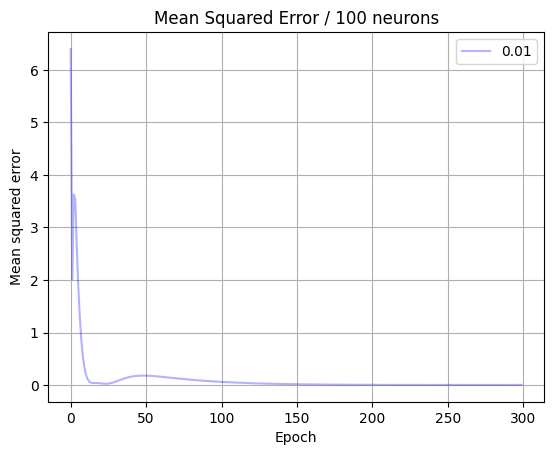

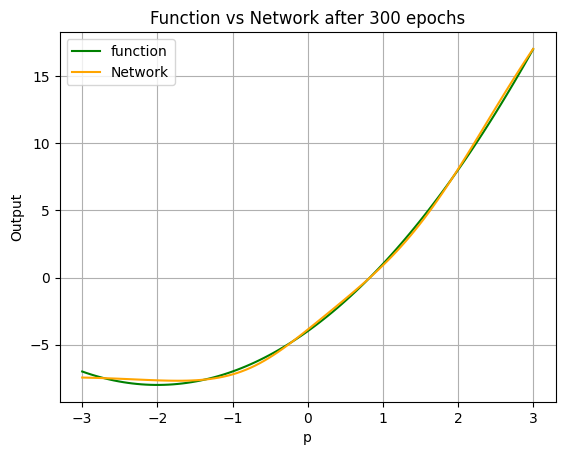

In [12]:
def approximate_function(a_0): #function we want to approximate
    return math.pow(a_0,2) + a_0*4 -4


if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:162.6870880126953
This is the 2 epoch
Mean Square error:4.913134574890137
This is the 3 epoch
Mean Square error:49.14765548706055
This is the 4 epoch
Mean Square error:19.790420532226562
This is the 5 epoch
Mean Square error:9.973793029785156
This is the 6 epoch
Mean Square error:2.975105047225952
This is the 7 epoch
Mean Square error:0.9476034641265869
This is the 8 epoch
Mean Square error:0.7454221248626709
This is the 9 epoch
Mean Square error:0.8725544214248657
This is the 10 epoch
Mean Square error:1.2991530895233154
This is the 11 epoch
Mean Square error:1.911677598953247
This is the 12 epoch
Mean Square error:2.4871065616607666
This is the 13 epoch
Mean Square error:2.9308652877807617
This is the 14 epoch
Mean Square error:3.2890732288360596
This is the 15 epoch
Mean Square error:3.4488680362701416
This is the 16 epoch
Mean Square error:3.5477046966552734
This is the 17 epoch
Mean Square error:3.3720147609710693
This is the 18 epoch
Mean Squ

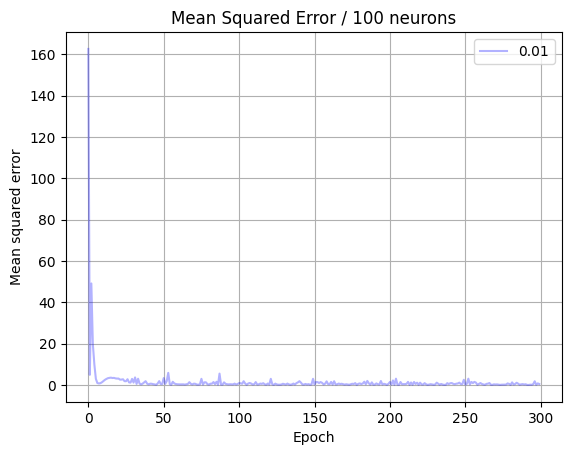

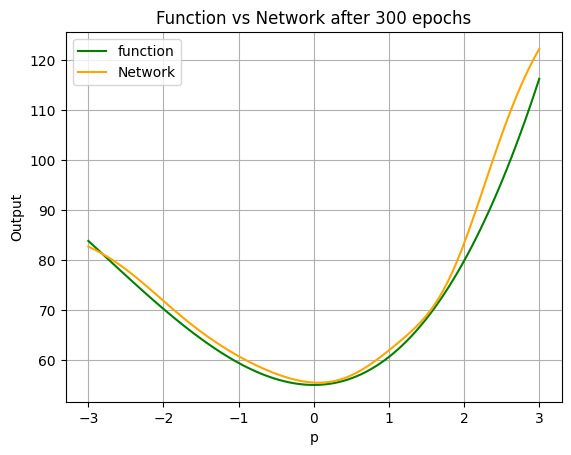

In [23]:
def approximate_function(a_0): #function we want to approximate
    return 0.6*math.pow(a_0,3)+5*math.pow(a_0,2)+55

if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:6.202364921569824
This is the 2 epoch
Mean Square error:3.0413269996643066
This is the 3 epoch
Mean Square error:0.43379825353622437
This is the 4 epoch
Mean Square error:0.4388599097728729
This is the 5 epoch
Mean Square error:0.3636113703250885
This is the 6 epoch
Mean Square error:0.2995668351650238
This is the 7 epoch
Mean Square error:0.2436477690935135
This is the 8 epoch
Mean Square error:0.19591361284255981
This is the 9 epoch
Mean Square error:0.15594114363193512
This is the 10 epoch
Mean Square error:0.12310759723186493
This is the 11 epoch
Mean Square error:0.09667672961950302
This is the 12 epoch
Mean Square error:0.07586291432380676
This is the 13 epoch
Mean Square error:0.05987049266695976
This is the 14 epoch
Mean Square error:0.04792400822043419
This is the 15 epoch
Mean Square error:0.03929079696536064
This is the 16 epoch
Mean Square error:0.03329668939113617
This is the 17 epoch
Mean Square error:0.029336979612708092
This is the 

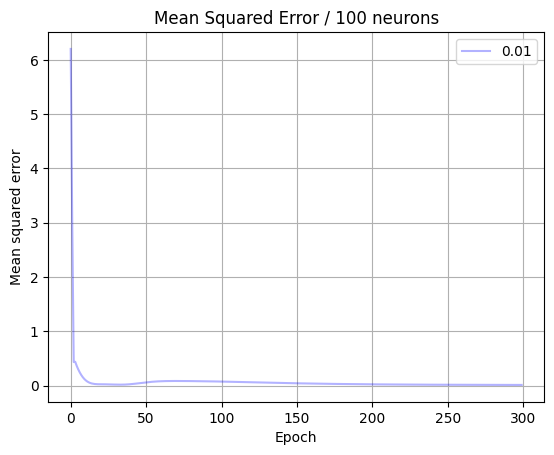

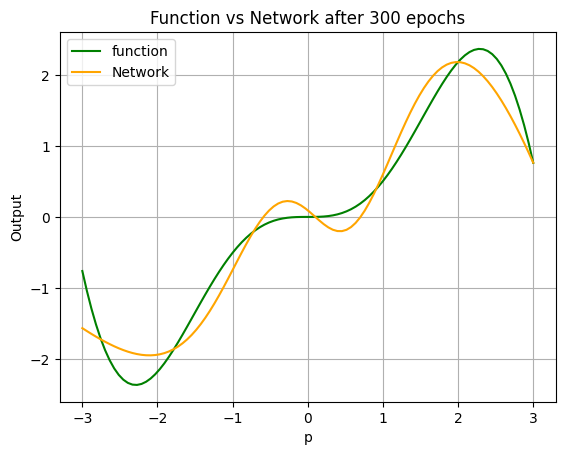

In [14]:
def approximate_function(a_0): #function we want to approximate
    return 0.6*math.pow(a_0,2)*math.sin(a_0)

if __name__ == '__main__':
    main()